# NOTEBOOK_ML📕
Prévision crédit Immobilier 

In [23]:
import mysql.connector

In [24]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
import pickle

In [25]:
df_clean=pd.read_csv('train.csv')

In [26]:
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df_clean.drop(['Loan_ID'], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# lBE = LabelEncoder()
# categ = ['Loan_Status']
# df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
# df_clean

In [7]:
# sur la target
df_clean.Loan_Status=df_clean.Loan_Status.map({'Y':1,'N':0})

In [8]:
# Convertir le target a une valeur numerique binaire 
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['Loan_Status'] = le.fit_transform(df_clean['Loan_Status'])
# df_clean.head()

In [9]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe=pd.DataFrame(ohe.fit_transform(X_train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]).toarray())
X_train_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"])

X_test_ohe=pd.DataFrame(ohe.transform(X_test[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]).toarray())
X_test_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"])

NameError: name 'X_train' is not defined

In [14]:
ohe = OneHotEncoder(handle_unknown='ignore')
One_hot = pd.DataFrame(ohe.fit_transform(df_clean[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]).toarray())
One_hot.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"])
df_clean.drop(["Loan_ID"] ,axis=1, inplace=True)
df_clean= pd.concat([df_clean, One_hot], axis=1)
One_hot

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
610,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
611,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
X = df_clean.drop(["Loan_Status"], axis=1)
y = df_clean.Loan_Status

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [17]:
X_train.shape

(491, 30)

In [18]:
y_train.shape

(491,)

In [19]:
preprocessing_StandardScaler = Pipeline(steps=[
    ("standardscaler", StandardScaler())])

In [20]:
# automatise le SMOTE
Dummy_smote = SMOTE( sampling_strategy='auto')

In [21]:
DummyPipeline = imbpipeline(steps=[["smote" , Dummy_smote],
                               ["classifier", DummyClassifier()]])

In [22]:
# fit sur le X et y train
DummyPipeline.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'

In [24]:
# df_credit.Loan_Status.head(10)

In [25]:
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [29]:
# sur la target
df_clean.Loan_Status=df_clean.Loan_Status.map({'Y':1,'N':0})

In [30]:
# df_clean[:-2]

In [39]:
X = df_clean.drop("Loan_Status", axis=1)

In [40]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [41]:
y = df_clean["Loan_Status"]

In [42]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [154]:
# X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [155]:
# X = df_clean.drop(["Loan_Status"], axis=1)
# y = df_clean.Loan_Status

In [156]:
# X_train.shape

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [195]:
# y_train = LabelEncoder()
# categ = ['Loan_Status']
# df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
# df_clean

TypeError: 'LabelEncoder' object is not subscriptable

In [44]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe=pd.DataFrame(ohe.fit_transform(X_train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]).toarray())
X_train_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"])

X_test_ohe=pd.DataFrame(ohe.transform(X_test[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]).toarray())
X_test_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"])

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# FEATURE SCALING

# Preprocessing

In [163]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [45]:
preprocessing_MinMaxScaler = Pipeline(steps=[
    ("MinMaxscaler", MinMaxScaler())])

In [46]:
# preprocessing_StandardScaler = Pipeline(steps=[
#     ("standardscaler", StandardScaler())])

In [47]:
sm = SMOTE(sampling_strategy='auto')

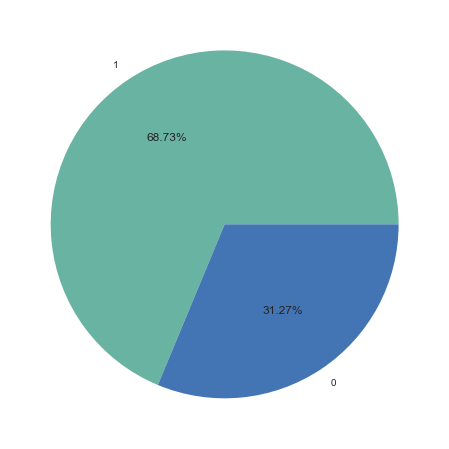

In [48]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

df_clean_value = df_clean['Loan_Status'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(df_clean_value,autopct='%1.2f%%',labels=df_clean_value.index)
plt.show()

# 1) Iteration_DummyClassifier

In [49]:
Dummy_smote = SMOTE(sampling_strategy='auto')

In [50]:
DummyPipeline = imbpipeline(steps=[["smote", Dummy_smote]
                                  ["classifier", DummyClassifier()]])

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-50-9f5186a6b086>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  DummyPipeline = imbpipeline(steps=[["smote", Dummy_smote]


TypeError: list indices must be integers or slices, not tuple

In [51]:
LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', LogisticRegression()]])

In [52]:
pipeline_DC = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [53]:
pipeline_DC = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [54]:
pipeline_DC.fit(X_train_ohe, y_train)

Pipeline(steps=[('SMOTE', SMOTE()),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [55]:
pipeline_DC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [56]:
pipeline_DC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [57]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train_ohe , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test_ohe , y_test))

accuracy train : 0.489
accuracy test : 0.545


In [58]:
y_pred_pipeline_DC = pipeline_DC.predict(X_test_ohe) 

In [59]:
print(classification_report(y_test, y_pred_pipeline_DC))

              precision    recall  f1-score   support

           0       0.31      0.37      0.34        43
           1       0.62      0.55      0.58        80

    accuracy                           0.49       123
   macro avg       0.46      0.46      0.46       123
weighted avg       0.51      0.49      0.50       123



# Matrice confusion

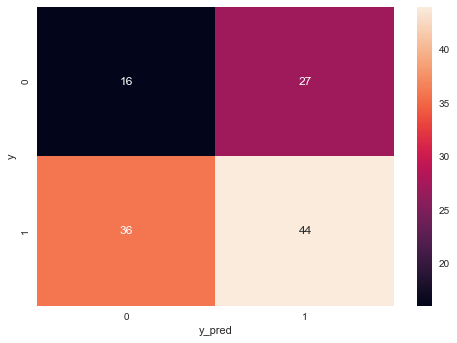

In [60]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_pipeline_DC)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

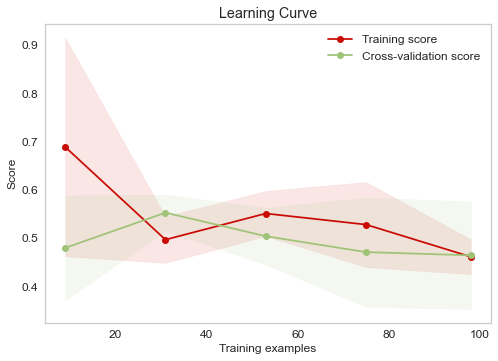

In [61]:
plot_learning_curve(pipeline_DC, X_test_ohe , y_test)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

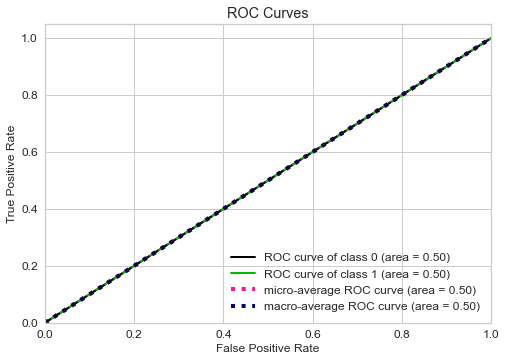

In [62]:
pipeline_DC.fit(X_train_ohe, y_train)
y_probas = pipeline_DC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 2) Iteration LogisiticRegression

In [63]:
LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', LogisticRegression()]])

In [64]:
LogicReg.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', LogisticRegression()]])

In [65]:
print("accuracy train : %.3f"%LogicReg.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test_ohe , y_test))   

accuracy train : 0.894
accuracy test : 0.780


In [66]:
y_pred_LogicReg = LogicReg.predict(X_test_ohe) 

In [67]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



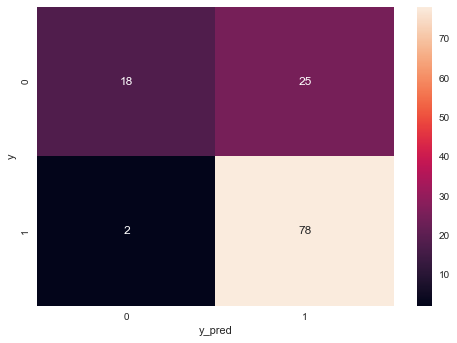

In [68]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

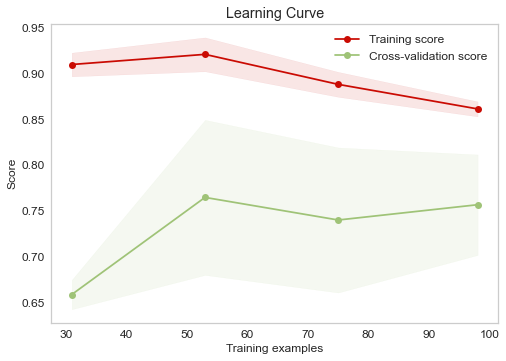

In [69]:
plot_learning_curve(LogicReg,X_test_ohe , y_test)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

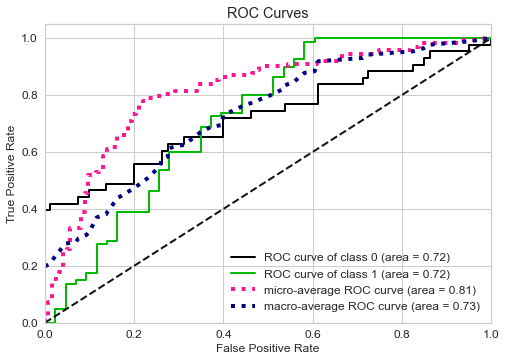

In [70]:
LogicReg.fit(X_train_ohe, y_train)
y_probas = LogicReg.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 3) Iteration KNeighborsClassifier

In [71]:
KNC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', KNeighborsClassifier()]])

In [72]:
KNC.fit(X_train_ohe, y_train)   

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [73]:
print("accuracy train : %.3f"%KNC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%KNC.score(X_test_ohe , y_test))

accuracy train : 0.815
accuracy test : 0.691


In [74]:
y_pred_KNC = KNC.predict(X_test_ohe) 

In [75]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.65      0.26      0.37        43
           1       0.70      0.93      0.80        80

    accuracy                           0.69       123
   macro avg       0.67      0.59      0.58       123
weighted avg       0.68      0.69      0.65       123



# matrice confusion

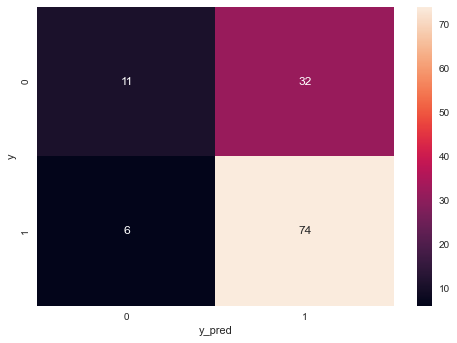

In [76]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

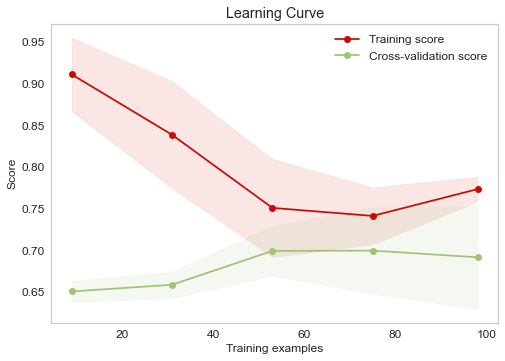

In [77]:
plot_learning_curve(KNC,X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

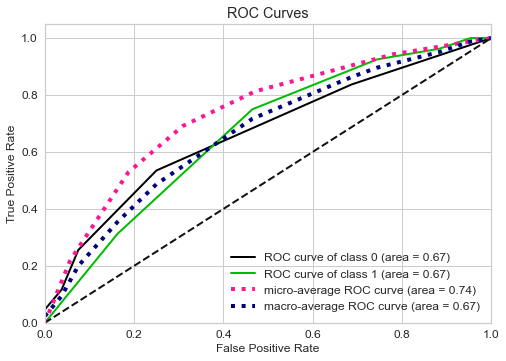

In [78]:
KNC.fit(X_train_ohe, y_train) 
y_probas = KNC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 4) Iteration- DecisionTree

In [79]:
DeT = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DecisionTreeClassifier()]])

In [80]:
KNC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [81]:
print("accuracy train : %.3f"%KNC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%KNC.score(X_test_ohe , y_test))

accuracy train : 0.815
accuracy test : 0.691


In [82]:
y_pred_KNC = KNC.predict(X_test_ohe) 

In [83]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.65      0.26      0.37        43
           1       0.70      0.93      0.80        80

    accuracy                           0.69       123
   macro avg       0.67      0.59      0.58       123
weighted avg       0.68      0.69      0.65       123



# matrice confusion

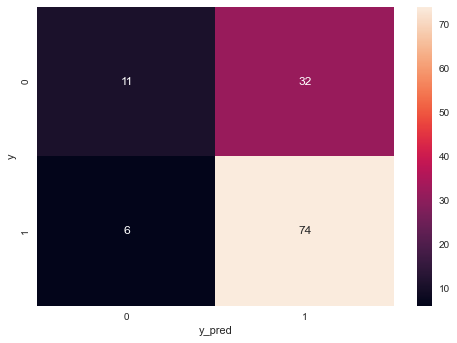

In [84]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

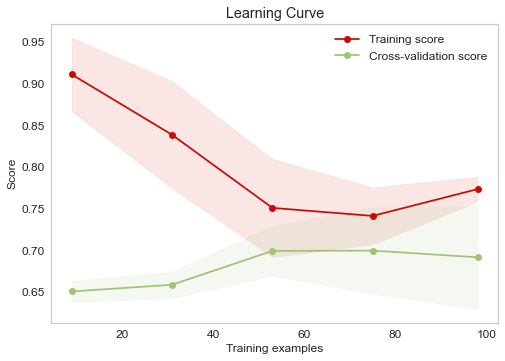

In [85]:
plot_learning_curve(KNC, X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

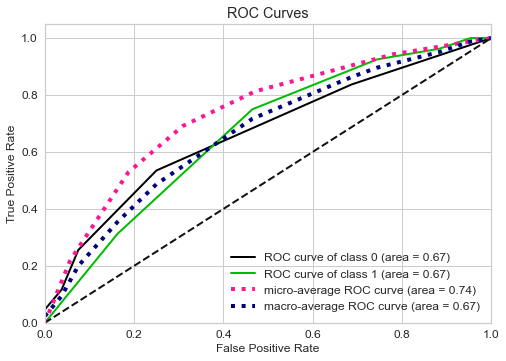

In [86]:
KNC.fit(X_train_ohe, y_train)
y_probas = KNC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 5) Iteration-Bagging(RandomForestClassifier)

In [87]:
RFC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', RandomForestClassifier()]])

In [88]:
RFC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', RandomForestClassifier()]])

In [89]:
print("accuracy train : %.3f"%RFC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%RFC.score(X_test_ohe , y_test))

accuracy train : 1.000
accuracy test : 0.789


In [90]:
y_pred_RFC = RFC.predict(X_test_ohe) 

In [91]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



# matrice confusion

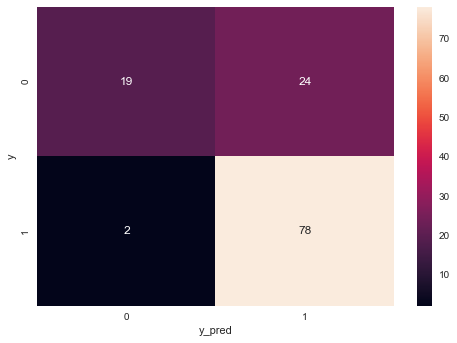

In [92]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

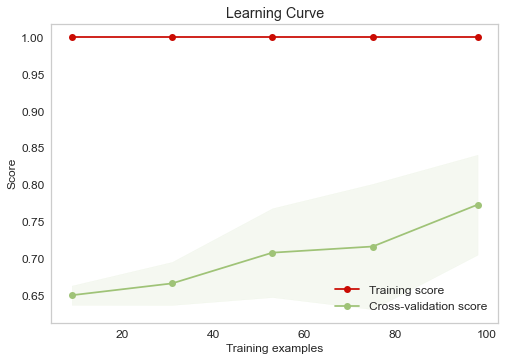

In [93]:
plot_learning_curve(RFC, X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

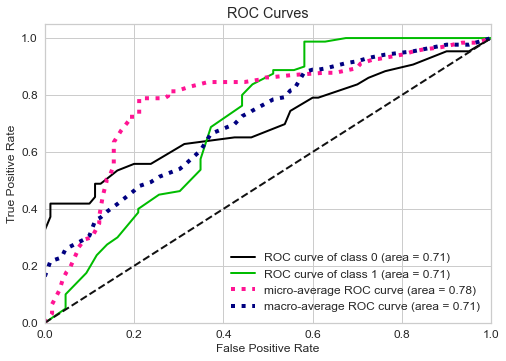

In [94]:
RFC.fit(X_train_ohe, y_train)
y_probas = RFC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 6) Iteration-Boosting(GradientBoostingClassifier)

In [95]:
GBC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', GradientBoostingClassifier()]])

In [96]:
GBC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', GradientBoostingClassifier()]])

In [97]:
print("accuracy train : %.3f"%GBC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%GBC.score(X_test_ohe , y_test))

accuracy train : 0.835
accuracy test : 0.780


In [98]:
y_pred_GBC = GBC.predict(X_test_ohe)

In [99]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



# matrice confusion

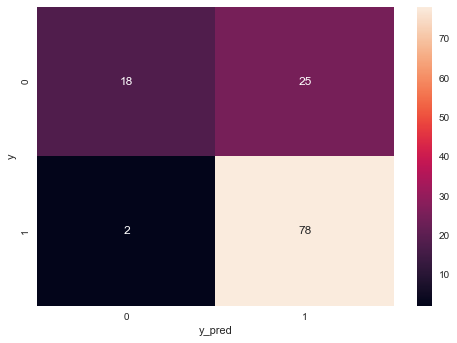

In [100]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

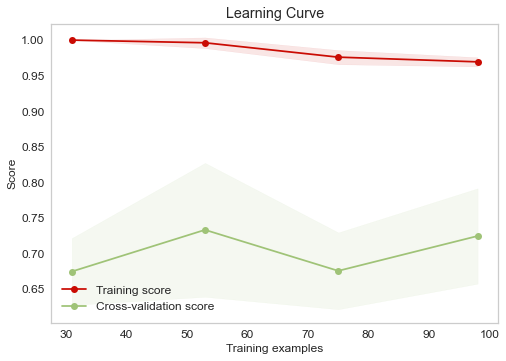

In [101]:
plot_learning_curve(GBC,X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

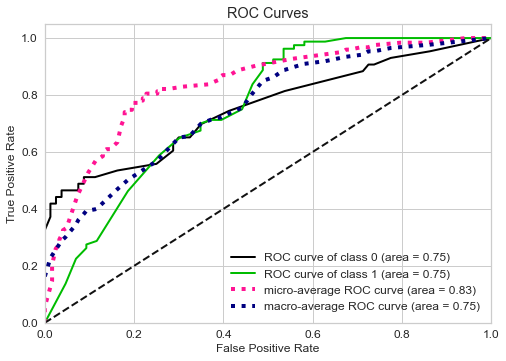

In [102]:
GBC.fit(X_train_ohe, y_train)
y_probas = GBC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

In [103]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

NameError: name 'classify' is not defined

In [81]:
# faire une prevision 
# profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
# RFC.predict(profil_test)

# Enregsiter le modele

In [77]:
pickle.dump(RFC,open('model.pkl','wb'))

In [78]:
filename="model1.pkl"


In [79]:
import pickle
with open(filename, 'wb') as f:
    pickle.dump(RFC, f)

In [80]:
with open(filename, 'rb') as f:
    m = pickle.load(f)

In [81]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="youcef." , database="loan_prediction")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction_data"
cur.execute(query)
tables = cur.fetchone()

ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)

# PICKLE

In [87]:
# # Export pipeline as pickle file
# with open("model.pkl", "wb") as file:
#     pickle.dump(pipe_model, file)

# # Load pipeline from pickle file
# my_pipeline = pickle.load(open("model.pkl","rb"))

# # Et on test le score
# my_pipeline.score(X_test, y_test)

In [89]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(RFC, file)